In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Checking NULL values

In [3]:
dataset.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
dataset.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Ploting some graphs

<BarContainer object of 200 artists>

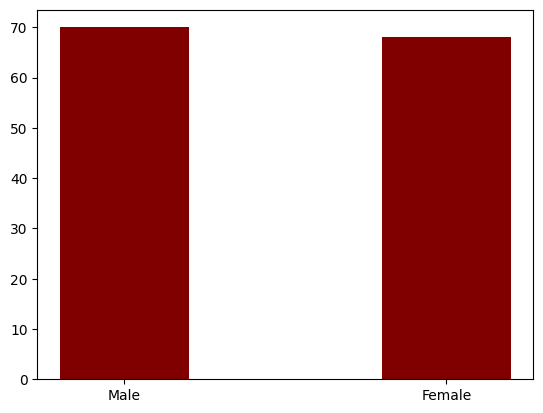

In [5]:
plt.bar(dataset['Genre'], dataset['Age'], color='maroon', width=0.4)

<BarContainer object of 200 artists>

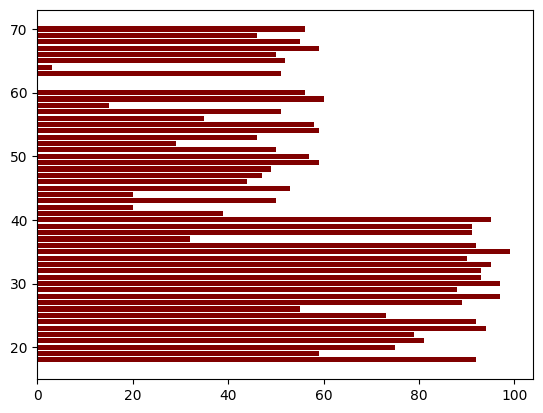

In [6]:
plt.barh(dataset['Age'], dataset['Spending Score (1-100)'], color='maroon')

<BarContainer object of 200 artists>

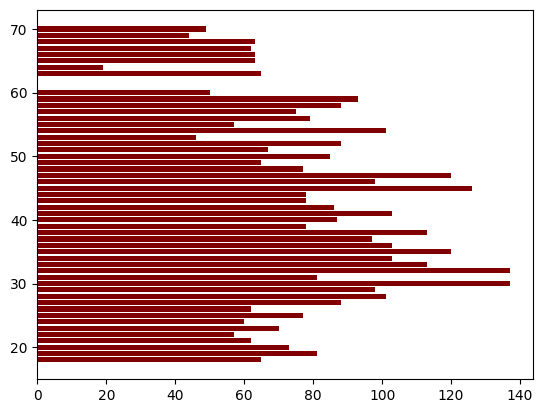

In [7]:
plt.barh(dataset['Age'], dataset['Annual Income (k$)'], color='maroon')

([<matplotlib.patches.Wedge at 0x15af7e540>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')])

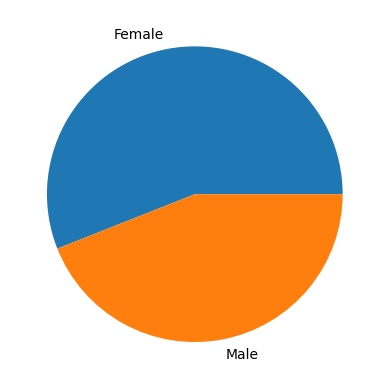

In [8]:
freq = dataset['Genre'].value_counts()
plt.pie(freq.values, labels=freq.index)

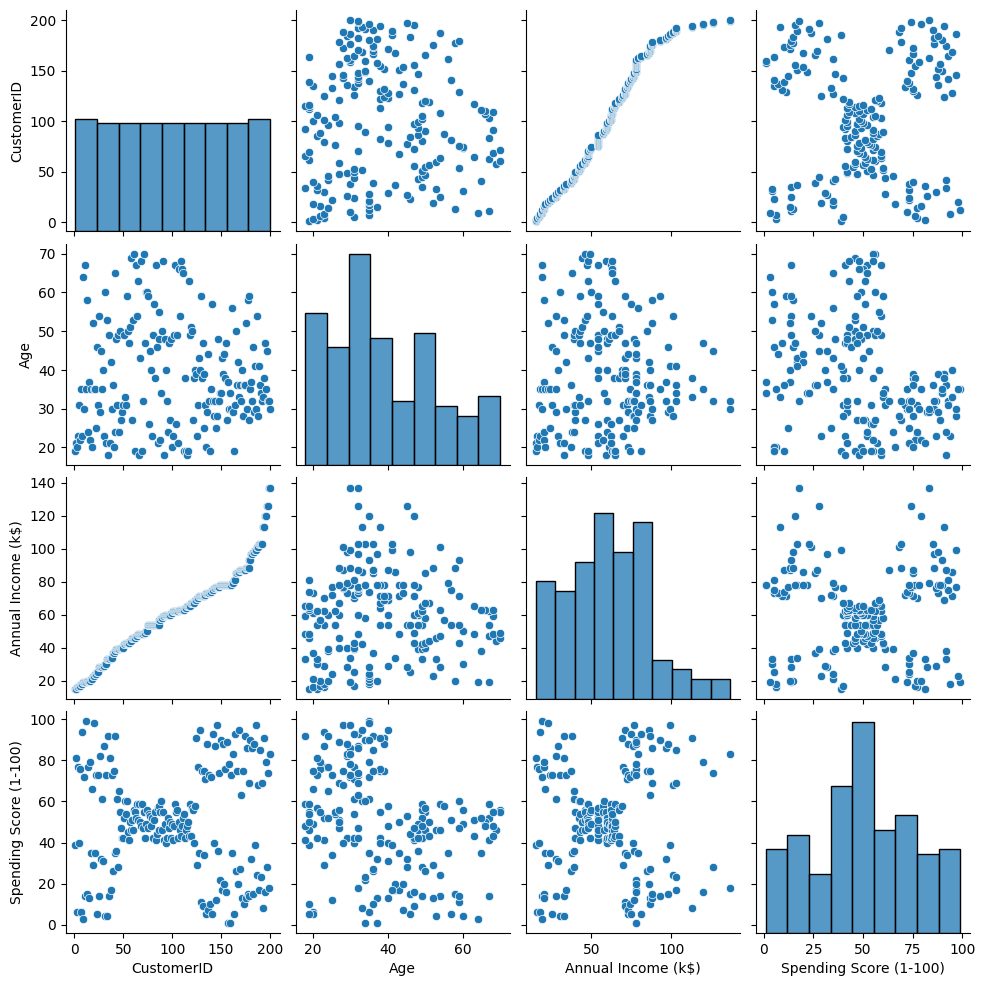

In [9]:
sns.pairplot(dataset)

<Axes: title={'center': 'Unclustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

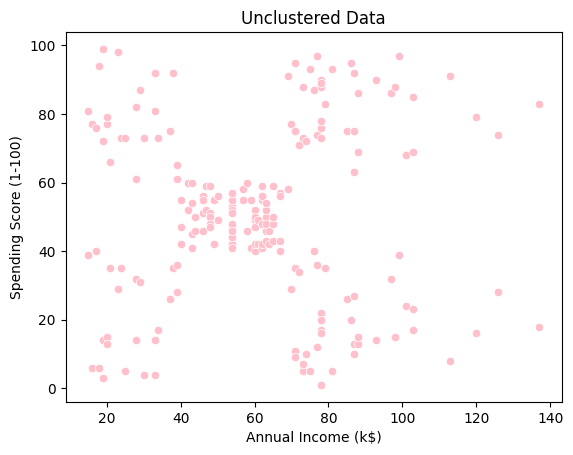

In [11]:
plt.title("Unclustered Data")
sns.scatterplot(x=dataset['Annual Income (k$)'], y=dataset['Spending Score (1-100)'], color='pink')

# Making imp changes

#### 1. Drop the customer_id column
#### 2. Label Encode the Gender column

In [12]:
#dataset.drop('CustomerID', axis=1, inplace=True)
#dataset

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['Genre'] = le.fit_transform(dataset['Genre'])       # Male->1, Female->0

In [14]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


# K-Means clustering

In [15]:
from sklearn.cluster import KMeans

X = dataset.iloc[:,3:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [16]:
model =  KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [17]:
preds = model.predict(X)
preds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

## Displaying inertia of model

# Displaying model's inertia

In [18]:
model.inertia_

106348.37306211119

# Silhouette_score

In [19]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, preds)
score

0.46761358158775435

In [20]:
inertia = []
for i in range(2,16):
    model = KMeans(n_clusters=i)
    model.fit(X)

    inertia.append(model.inertia_)

inertia

[183782.02842618528,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37442.24745037571,
 30259.65720728547,
 31748.72207637324,
 26091.5438648406,
 22850.86414406918,
 19848.66562695726,
 16319.295013841314,
 14574.41112452441,
 13890.084540459542,
 14174.700570980745]

# Ploting graph of SSE scores

Text(0, 0.5, 'Inertia')

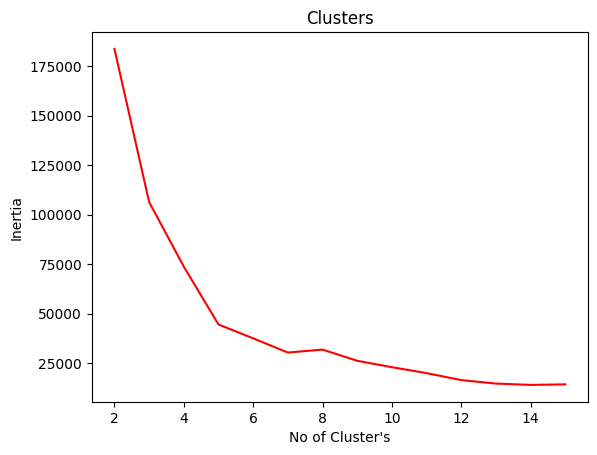

In [21]:
plt.title("Clusters")
sns.lineplot(x = range(2,16), y=inertia, color='red')
plt.xlabel("No of Cluster's")
plt.ylabel("Inertia")

In [22]:
sil = []

for i in range(2,16):
    model = KMeans(n_clusters=i)
    model.fit(X)
    preds = model.predict(X)
    score = silhouette_score(X, preds)
    sil.append(score)

sil

[0.2968969162503008,
 0.46761358158775435,
 0.4937945814354117,
 0.553931997444648,
 0.5367558067779578,
 0.4537173684163333,
 0.44674527365692485,
 0.44448346363140695,
 0.4199709454596911,
 0.45626429272474894,
 0.4092311613632216,
 0.401784699949951,
 0.426239253286392,
 0.3873405922459382]

Text(0, 0.5, 'Silhoutte Score')

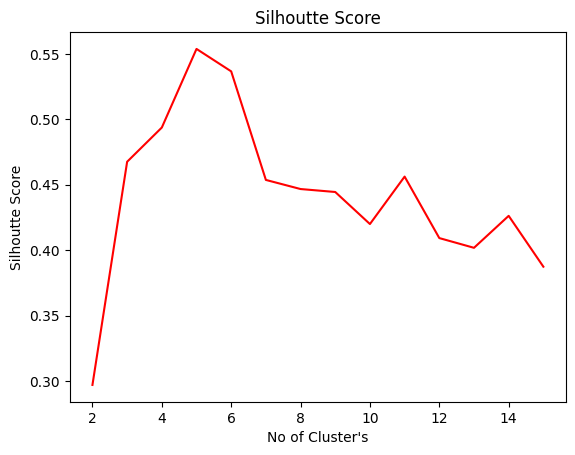

In [23]:
plt.title("Silhoutte Score")
sns.lineplot(x = range(2,16), y=sil, color='red')
plt.xlabel("No of Cluster's")
plt.ylabel("Silhoutte Score")

Text(0, 0.5, 'Silhoutte Score')

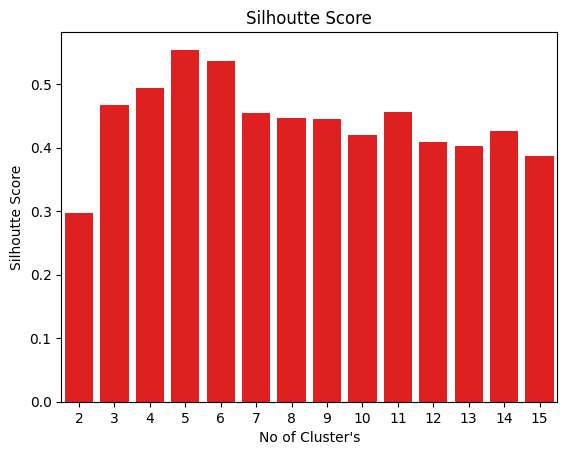

In [24]:
plt.title("Silhoutte Score")
sns.barplot(x = range(2,16), y=sil, color='red')
plt.xlabel("No of Cluster's")
plt.ylabel("Silhoutte Score")

# Building and training the model

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.2)

len(X_train), len(X_test)

(160, 40)

In [26]:
model = KMeans(n_clusters=5)
model.fit(X_train)

KMeans(n_clusters=5)

In [27]:
train_preds = model.predict(X_train)

test_preds = model.predict(X_test)
test_preds

array([2, 1, 0, 0, 0, 0, 0, 1, 4, 0, 2, 2, 0, 0, 0, 0, 4, 1, 0, 0, 0, 1,
       0, 0, 0, 3, 3, 0, 2, 0, 0, 0, 1, 1, 4, 0, 3, 0, 4, 0], dtype=int32)

In [28]:
model.inertia_

35738.56282720655

In [29]:
score = silhouette_score(X_test, test_preds)
score

0.5424553190719559

# Finding out centers of the clusters

In [30]:
centers = model.cluster_centers_
centers

array([[55.63793103, 49.68965517],
       [85.84848485, 81.78787879],
       [88.32258065, 17.12903226],
       [25.21052632, 80.26315789],
       [27.68421053, 20.89473684]])

# Ploting the Final Plot

In [31]:
X_train.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

Text(0, 0.5, 'Spending Score')

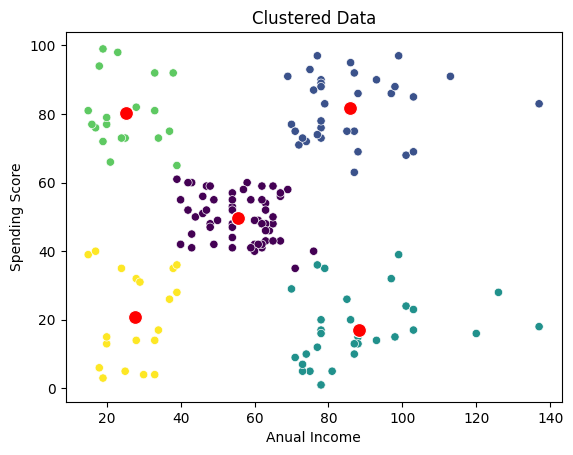

In [35]:
plt.title("Clustered Data")
sns.scatterplot(x=X_train['Annual Income (k$)'], y=X_train['Spending Score (1-100)'], c=train_preds)
sns.scatterplot(x=centers[:,0], y=centers[:,1], s=100, color='red')
plt.xlabel('Anual Income')
plt.ylabel('Spending Score')

# Agglomerative Clustering

In [230]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5)

cluster = model.fit(X_train)

In [231]:
train_preds = cluster.labels_
train_preds

array([3, 1, 0, 3, 0, 4, 2, 1, 1, 1, 0, 4, 1, 1, 1, 4, 3, 0, 1, 0, 1, 4,
       3, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 4, 1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 0, 3, 0, 0, 1, 2, 3, 3, 1, 1, 1, 4, 2, 1, 1, 4, 1, 1, 1, 3,
       3, 0, 3, 4, 3, 0, 3, 4, 3, 0, 0, 4, 3, 1, 0, 1, 3, 3, 1, 0, 4, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 3, 4, 0, 3, 1,
       3, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 4, 1, 2, 4, 0, 1, 1, 2, 1, 3,
       1, 1, 0, 1, 4, 4])

In [232]:
sil = silhouette_score(X_train, train_preds)
sil

0.5692762138067956

In [233]:
cluster = model.fit(X_test)

test_preds = cluster.labels_
test_preds

array([4, 4, 2, 4, 2, 4, 1, 4, 0, 2, 2, 1, 0, 1, 1, 2, 4, 1, 4, 1, 4, 0,
       3, 3, 3, 1, 3, 1, 0, 0, 4, 1, 3, 1, 0, 2, 3, 1, 0, 0])

<Axes: title={'center': 'Clustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

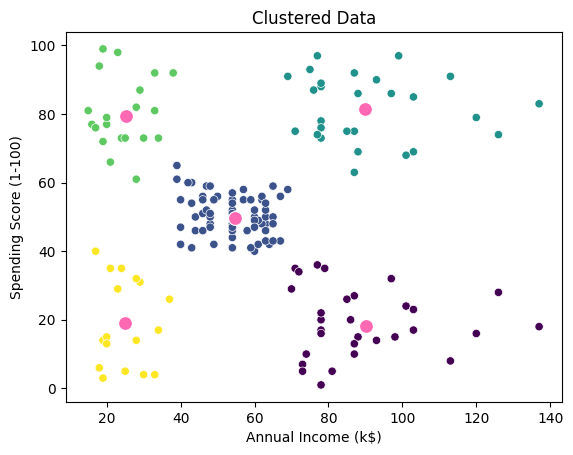

In [237]:
plt.title("Clustered Data")
sns.scatterplot(x = X_train['Annual Income (k$)'] , y = X_train['Spending Score (1-100)'] , c = train_preds)
sns.scatterplot(x = centers[:,0] , y = centers[:,1] , s=100 , color = 'hotpink')

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

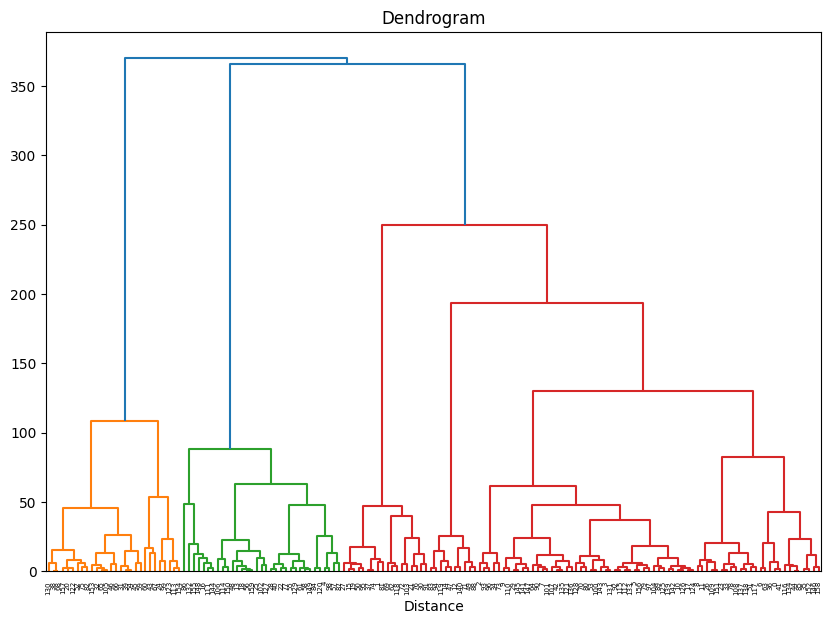

In [41]:
link = linkage(X_train, method='ward')

plt.figure(figsize=(10,7))
plt.title('Dendrogram')

dendrogram(link)
plt.xlabel('Index')
plt.xlabel('Distance')
plt.show()